# Load and preprocessing data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load your dataset
df = pd.read_csv('final_cleaned_survey_4.csv')

In [33]:
df.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,mh_impact_score
0,2014-08-27 11:29:31,37.0,FeMale,USA,IL,Unknown,No,1,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,No comments,3
1,2014-08-27 11:29:37,44.0,M,USA,IN,Unknown,No,0,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,No comments,1
2,2014-08-27 11:29:44,32.0,Male,Canada,Unknown,Unknown,No,0,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,No comments,1
3,2014-08-27 11:29:46,31.0,Male,UK,Unknown,Unknown,Yes,1,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,No comments,3
4,2014-08-27 11:30:22,31.0,Male,USA,TX,Unknown,No,0,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No comments,0


In [ ]:
df['self_employed'] = df['tech_company'].astype(str)


In [ ]:
df['care_options'] = df['care_options'].replace({'Not sure': '''Don't know''','I am not sure':'''Don't know'''})

In [ ]:
df['care_options'].unique()

array(["Don't know", 'No', 'Yes'], dtype=object)

In [ ]:
df['wellness_program'] = df['wellness_program'].replace({'''I don't know''': '''Don't know'''})

In [ ]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [ ]:
df['seek_help'] = df['seek_help'].replace({'''I don't know''': '''Don't know'''})

In [ ]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
df['anonymity'] = df['anonymity'].replace({'''I don't know''': '''Don't know'''})

In [ ]:
df['anonymity'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
df['leave'] = df['leave'].replace({'''Don’t know''':'''Don't know''', '''I don't know''': '''Don't know'''})

In [ ]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy', 'Neither easy nor difficult'],
      dtype=object)

In [ ]:
df['coworkers'] = df['coworkers'].replace({'Some of them':'Maybe'})

In [ ]:
df['coworkers'].unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [ ]:
df['supervisor'] = df['supervisor'].replace({'Some of them':'Maybe'})

In [ ]:
df['supervisor'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [ ]:
df['mental_vs_physical'] = df['mental_vs_physical'].replace({'''I don't know''': '''Don't know'''})

In [ ]:
df['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
df['benefits'] = df['benefits'].replace({'1.0': 'Yes', 'NO':'No'})

In [ ]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'mh_impact_score',
       'survey_year',
       'do_you_have_medical_coverage_(private_insurance_or_state-provided)_which_includes_treatment_of_ mental_health_issues'],
      dtype='object')

In [ ]:
df["treatment"].unique()

array(['1', '0'], dtype=object)

In [ ]:
for col in df.columns:
    print(f"'{col}'")

'timestamp'
'age'
'gender'
'country'
'state'
'self_employed'
'family_history'
'treatment'
'work_interfere'
'no_employees'
'remote_work'
'tech_company'
'benefits'
'care_options'
'wellness_program'
'seek_help'
'anonymity'
'leave'
'mental_health_consequence'
'phys_health_consequence'
'coworkers'
'supervisor'
'mental_health_interview'
'phys_health_interview'
'mental_vs_physical'
'obs_consequence'
'comments'
'mh_impact_score'
'survey_year'
'do_you_have_medical_coverage_(private_insurance_or_state-provided)_which_includes_treatment_of_ mental_health_issues'


In [ ]:
df.to_csv('final_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('final_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_tunisia = df[df['country'] == 'Tunisia']

# Data analysis

## What personal and workplace factors are associated with seeking mental health treatment?

### General demographics

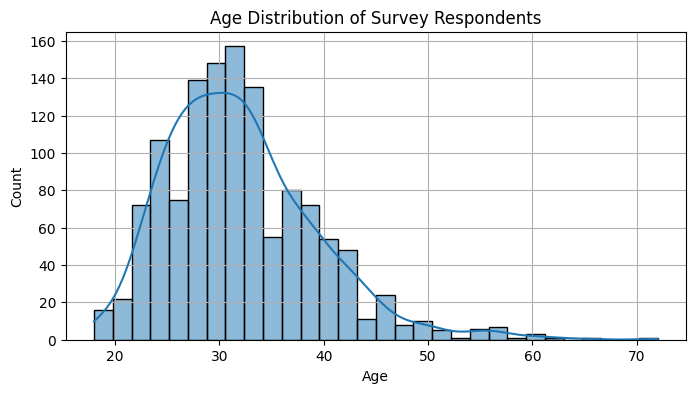

In [34]:
# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Survey Respondents")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

Most respondents are between 20 and 40 years old, indicating the majority are working-age adults — the primary target for workplace mental health programs.

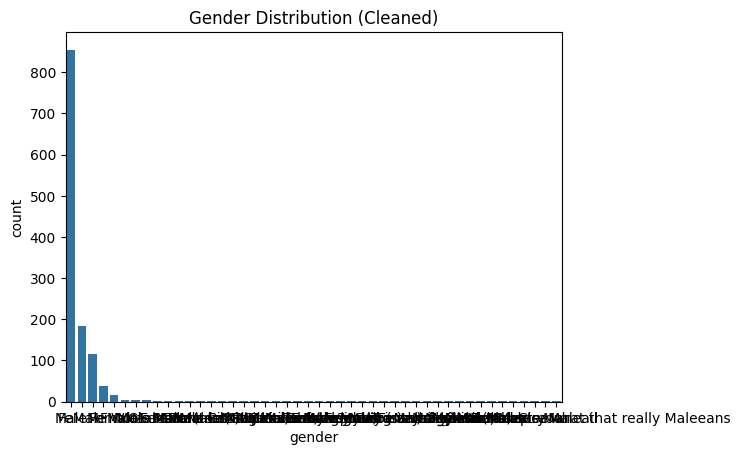

In [35]:
# Gender distribution (cleaned)
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
plt.title('Gender Distribution (Cleaned)')
plt.show()

Q: What percentage of people have sought mental health treatment? (our target variable)

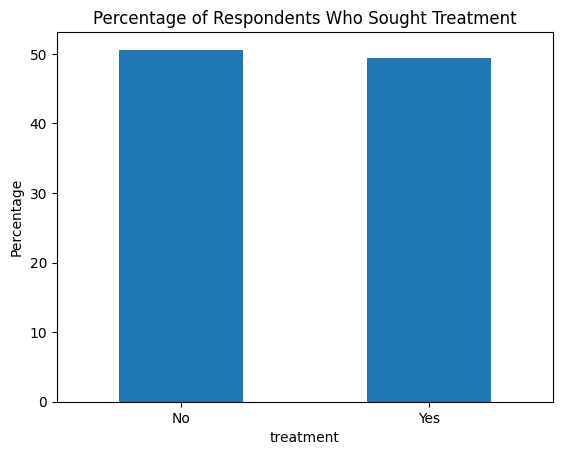

In [36]:
treatment_counts = df['treatment'].value_counts(normalize=True) * 100
treatment_counts.plot(kind='bar', title="Percentage of Respondents Who Sought Treatment", ylabel='Percentage')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

A significant portion (~48%) has sought mental health treatment, highlighting the prevalence of mental health challenges among workers.

### Family History

<ipython-input-37-f3bd21624fe2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-37-f3bd21624fe2>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


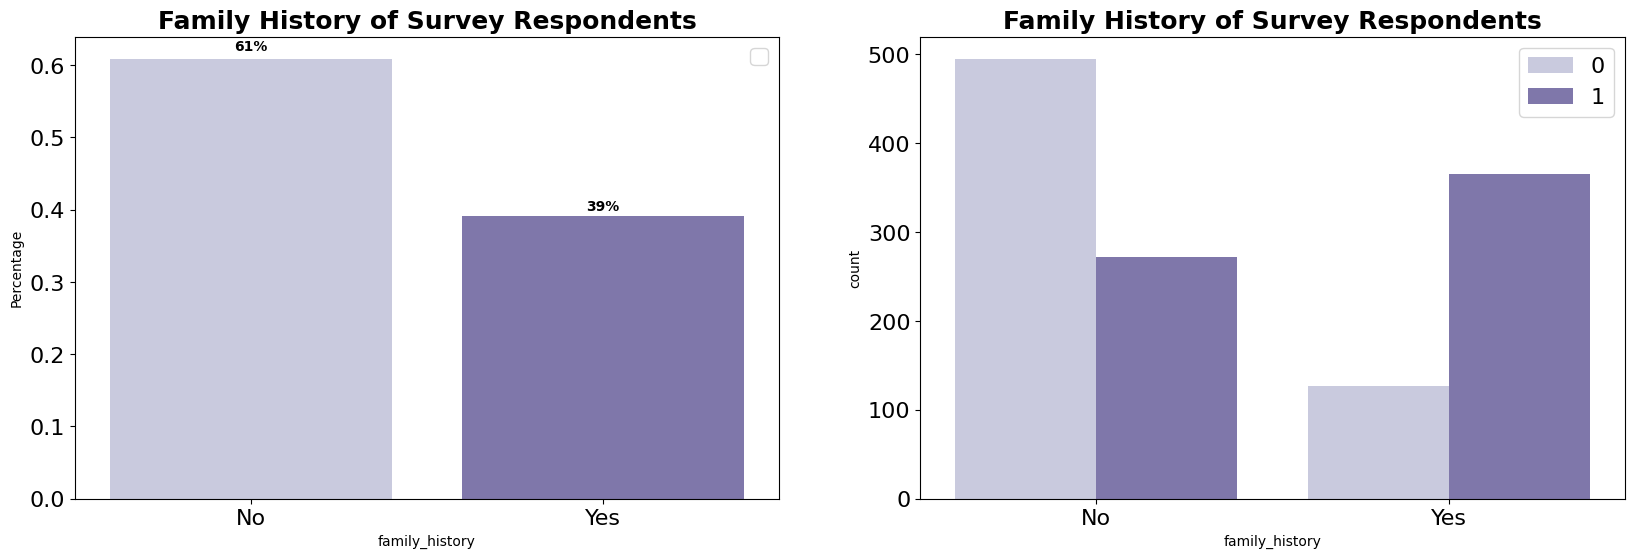

In [37]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data=df, x='family_history', hue='treatment', palette='Purples')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

People with a family history of mental illness are much more likely to seek treatment, indicating a strong familial influence.  the fact that people with a family history pay more attention to mental illness. Family history is a significant risk factor for many mental health disorders.

Thus, this is an important factor that has to be taken under consideration as it influences the behaviour of the employees to a significant extent.

### Self-employed

<ipython-input-38-919ca4189b35>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
<ipython-input-38-919ca4189b35>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


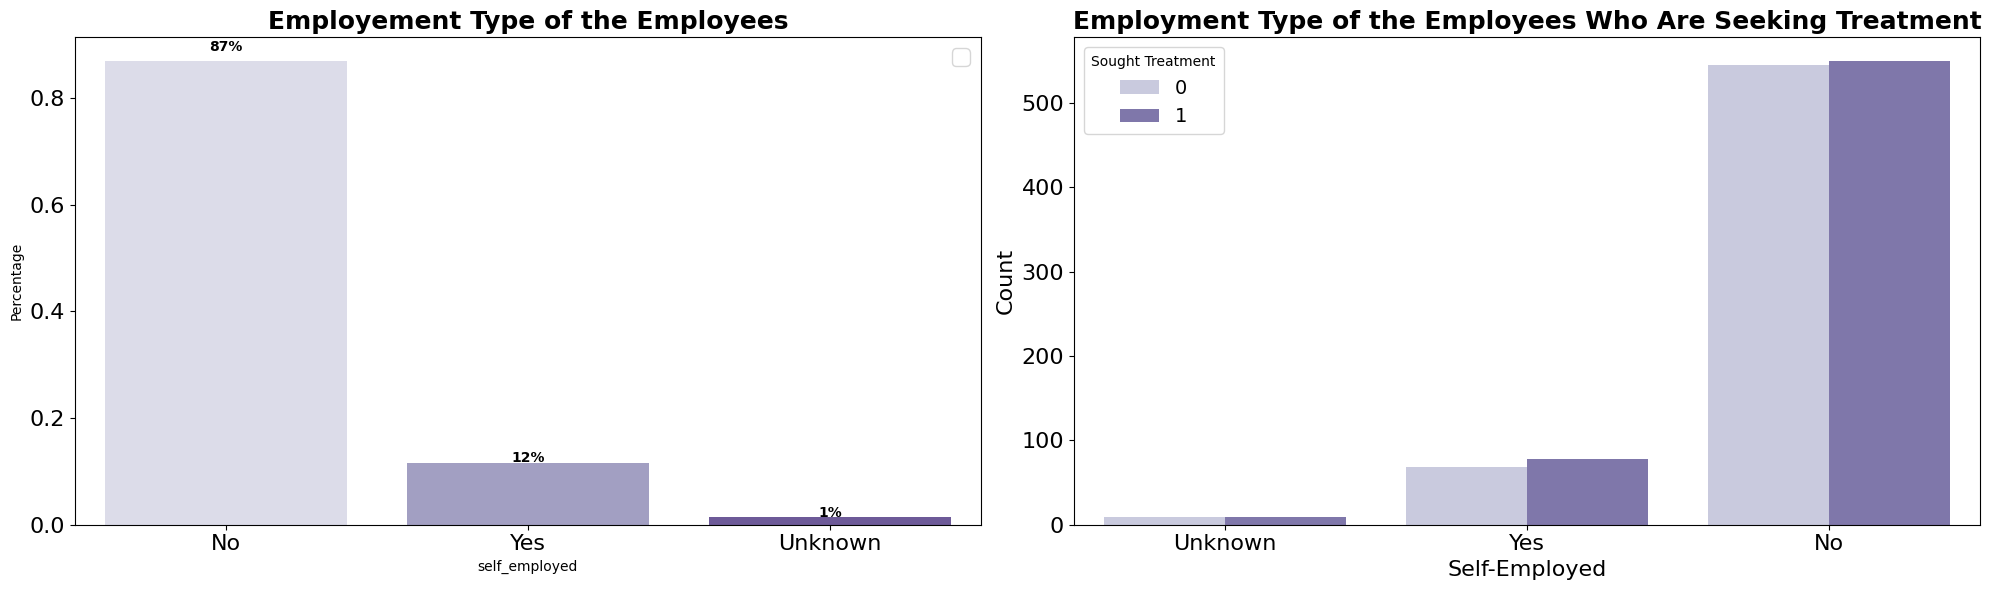

In [38]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x='self_employed', hue='treatment', data=df, palette='Purples')
plt.title('Employment Type of the Employees Who Are Seeking Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Self-Employed", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(title="Sought Treatment", fontsize=14)
plt.tight_layout()
plt.show()


plt.show()

We see that the number of people who are self employed are around 12%. Most of the people who responded to the survey belonged to working class. We also see that though there is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar.

Thus, we may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not.

In [39]:
treatment_rates = df.groupby('self_employed')['treatment'].value_counts(normalize=True).unstack()
print(treatment_rates)


treatment             0         1
self_employed                    
No             0.497717  0.502283
Unknown        0.500000  0.500000
Yes            0.465753  0.534247


### Country

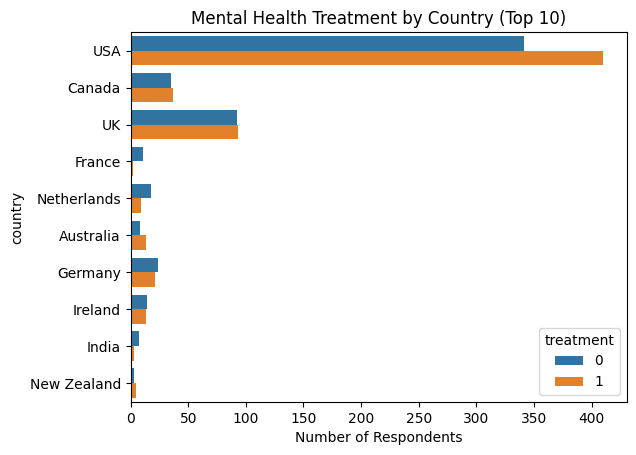

In [40]:

# Plot: Country vs treatment
top_countries = df['country'].value_counts().head(10).index
subset = df[df['country'].isin(top_countries)]

sns.countplot(data=subset, y='country', hue='treatment')
plt.title('Mental Health Treatment by Country (Top 10)')
plt.xlabel('Number of Respondents')
plt.show()

### Work interference level (impact)

<ipython-input-41-95a7b846bd00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Purples')


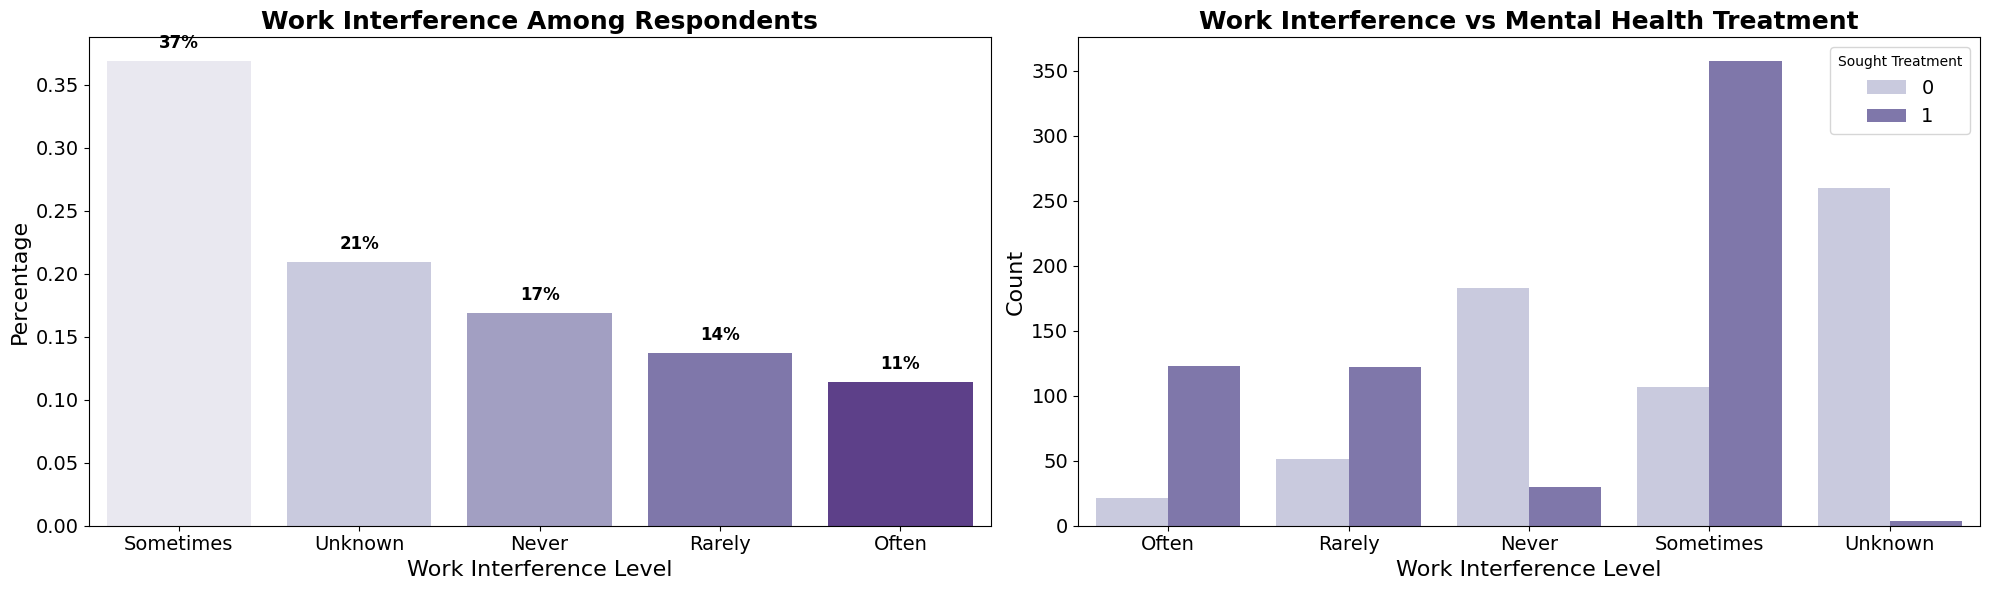

In [41]:
plt.figure(figsize=(20, 6))

# --- Subplot 1: Distribution of work interference ---
plt.subplot(1, 2, 1)
eda_percentage = df['work_interfere'].value_counts(normalize=True).rename_axis('work_interfere').reset_index(name='Percentage')
ax = sns.barplot(x='work_interfere', y='Percentage', data=eda_percentage, palette='Purples')

# Annotate bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2., height + 0.01),
                ha='center', fontsize=12, fontweight='bold')

plt.title('Work Interference Among Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Work Interference Level', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# --- Subplot 2: Work interference vs treatment ---
plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', hue='treatment', data=df, palette='Purples')

plt.title('Work Interference vs Mental Health Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Work Interference Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sought Treatment', fontsize=14)

plt.tight_layout()
plt.show()

This was the respondent's answer to the question, 'If you have a mental health condition, do you feel that it interferes with your work?'.

* On seeing the first graph we conclude that around 37% of people say that sometimes work interefers with their mental health. Now 'Sometimes' is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.
* Coming to our second graph, we see that the people who chose 'Sometimes' had the highest number of people who actually had a mental condition. Similar pattern was shown for the people who belonged to the *'Often category'. But what is more surprising to know is that even for people whose mental health 'Never' has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker.

### Remote / On site

<ipython-input-42-8ad893c478b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='remote_work', y='Percentage', data=eda_percentage, palette='Purples')


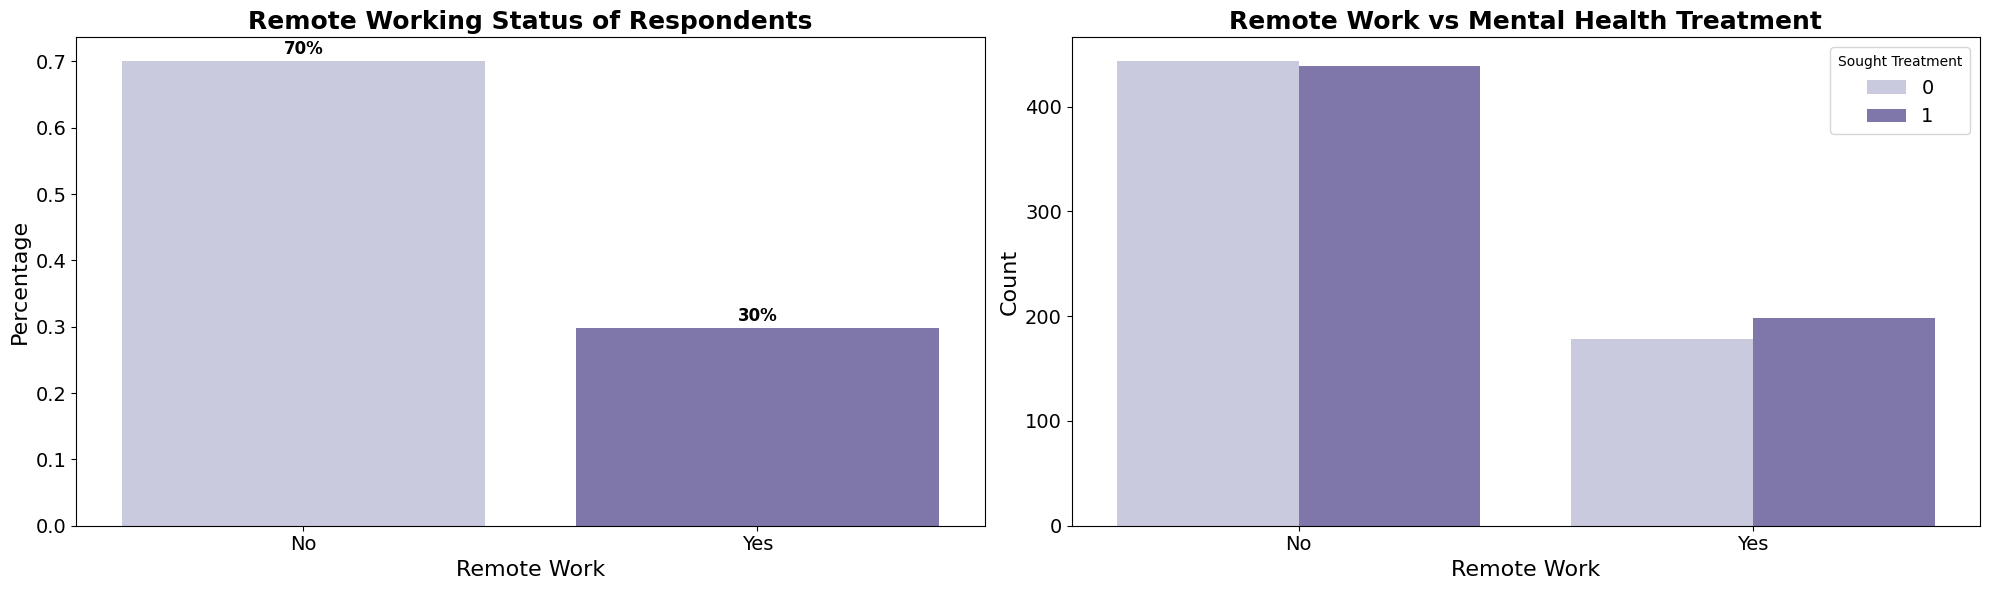

In [42]:

plt.figure(figsize=(20, 6))

# --- Subplot 1: Overall remote work distribution ---
plt.subplot(1, 2, 1)
eda_percentage = df['remote_work'].value_counts(normalize=True).rename_axis('remote_work').reset_index(name='Percentage')
ax = sns.barplot(x='remote_work', y='Percentage', data=eda_percentage, palette='Purples')

# Annotate bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width()/2., height + 0.01),
                ha='center', fontweight='bold', fontsize=12)

plt.title('Remote Working Status of Respondents', fontsize=18, fontweight='bold')
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# --- Subplot 2: Remote work vs treatment ---
plt.subplot(1, 2, 2)
sns.countplot(x='remote_work', hue='treatment', data=df, palette='Purples')

plt.title('Remote Work vs Mental Health Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Remote Work', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sought Treatment', fontsize=14)

plt.tight_layout()
plt.show()

This was the respondent's answer to the question, 'Do you work remotely (outside of an office) at least 50% of the time?'.

Around 70% of respondents don't work remotely, which means the biggest factor of mental health disorder came up triggered on the workplace. On the other side, it has slightly different between an employee that want to get treatment and don't want to get a treatment. The number of people who seek treatment in both the categories is more or less similar and it does not affect our target variable.

### Company type

<ipython-input-43-d6aa4d13573a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='tech_company', y='Percentage', data=eda_percentage, palette='Purples')


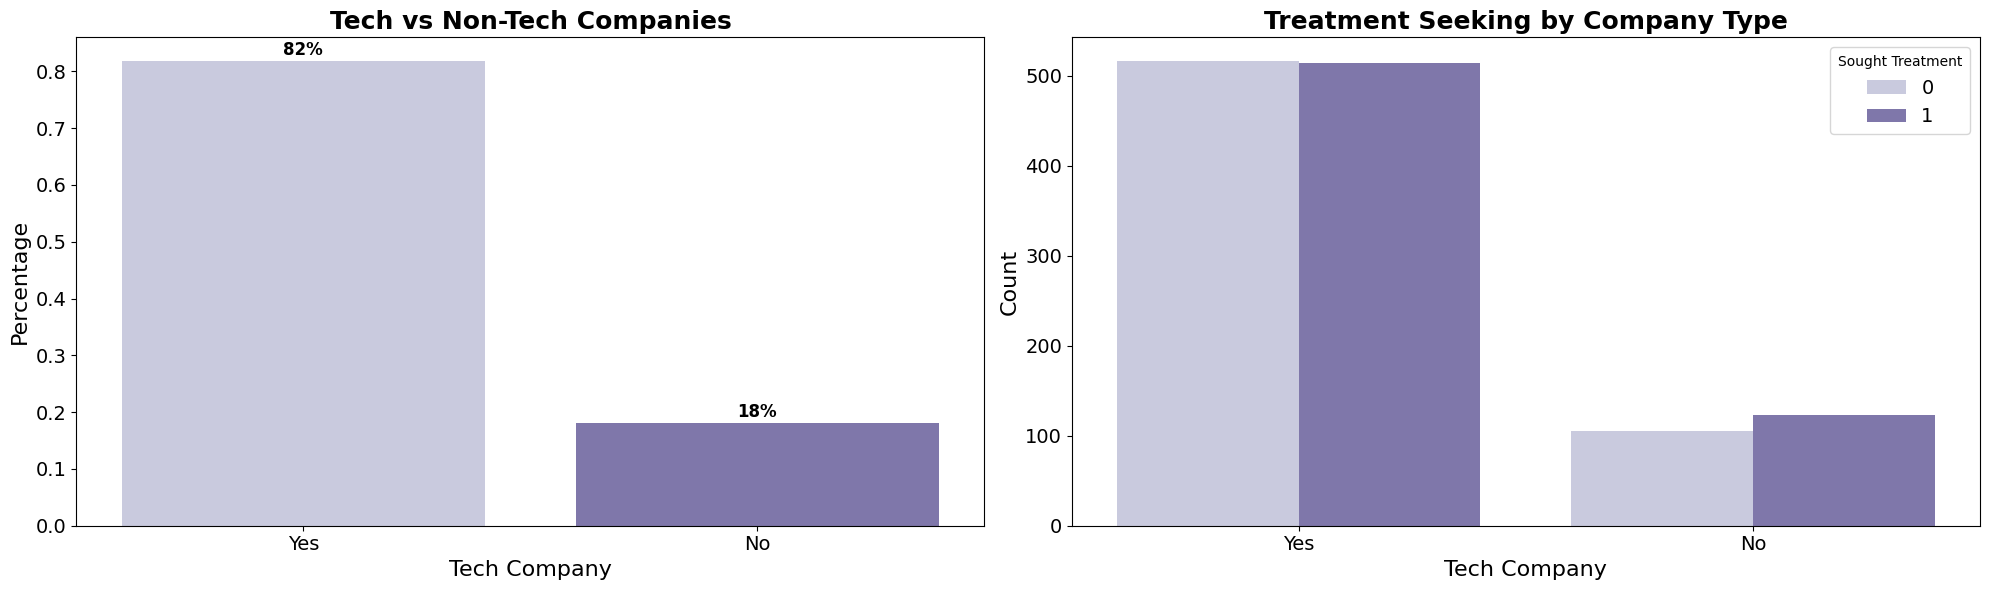

In [43]:
plt.figure(figsize=(20, 6))

# --- Subplot 1: Distribution of tech vs non-tech companies ---
plt.subplot(1, 2, 1)
eda_percentage = df['tech_company'].value_counts(normalize=True).rename_axis('tech_company').reset_index(name='Percentage')
ax = sns.barplot(x='tech_company', y='Percentage', data=eda_percentage, palette='Purples')

# Annotate percentage bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width()/2., height + 0.01),
                ha='center', fontweight='bold', fontsize=12)

plt.title('Tech vs Non-Tech Companies', fontsize=18, fontweight='bold')
plt.xlabel('Tech Company', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# --- Subplot 2: Treatment by company type ---
plt.subplot(1, 2, 2)
sns.countplot(x='tech_company', hue='treatment', data=df, palette='Purples')

plt.title('Treatment Seeking by Company Type', fontsize=18, fontweight='bold')
plt.xlabel('Tech Company', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sought Treatment', fontsize=14)

plt.tight_layout()
plt.show()

This is the respondents answer to the question, 'Is your employer primarily a tech company/organization?'.

Although the survey was specifically designed to be conducted in the tech field, there are close to 18% of the companies belonginf to the non tech field. However, looking at the second graph, one may conclude that whether a person belongs to the tech field or not, mental health still becomes a big problem.

However, on a deeper look we find that the number of employees in the tech sector who want to get treatment is slightly lower than the one's who don't. But in the non-tech field the situation gets reversed.

## Mental health and support

### Benfits (Does your employer provide mental health benefits? )

<ipython-input-44-c03197c90d60>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='benefits', y='Percentage', data=eda_percentage, palette='Purples')


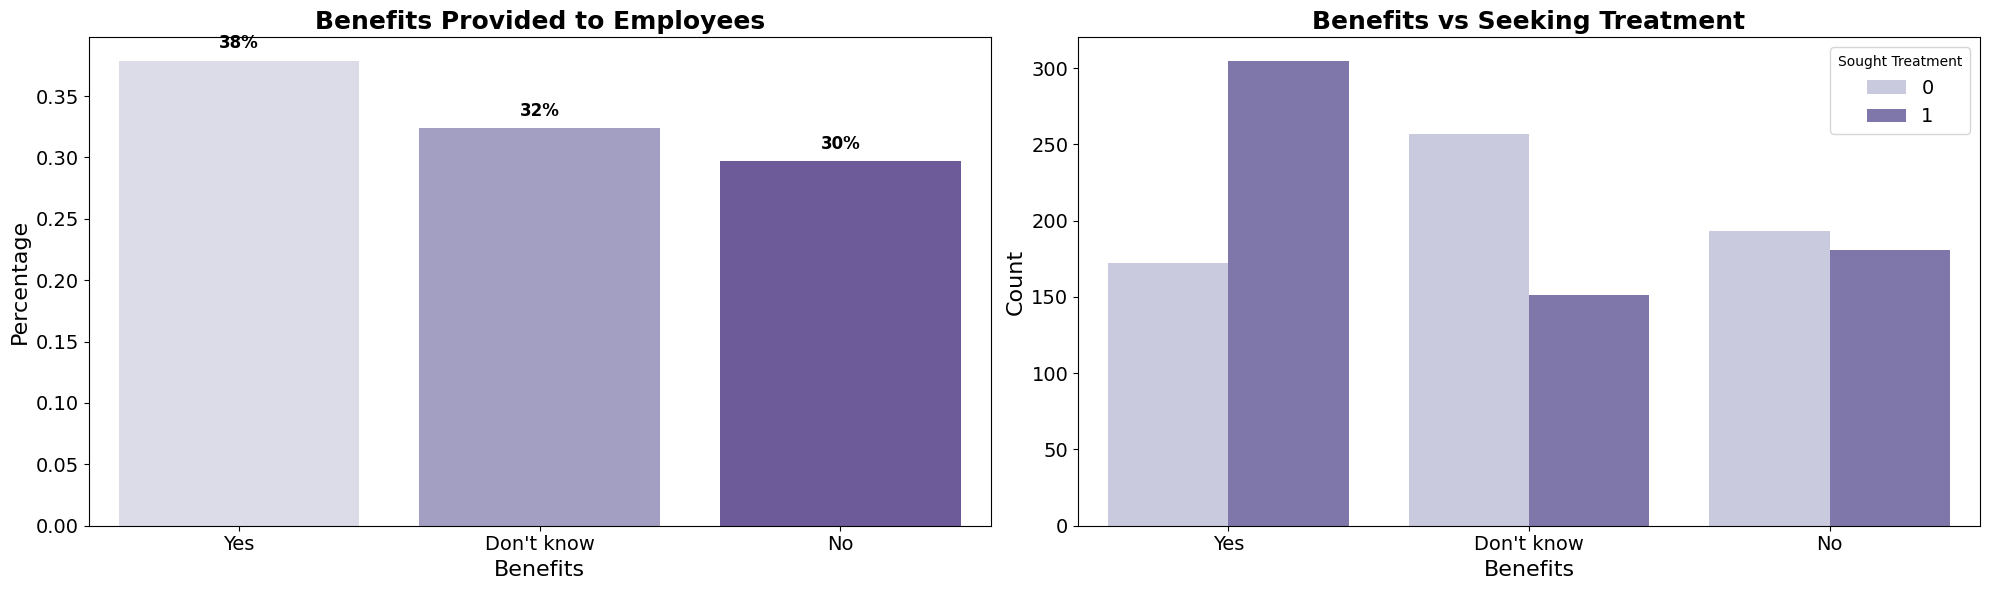

In [44]:
plt.figure(figsize=(20, 6))

# --- Subplot 1: Percentage distribution of benefits ---
plt.subplot(1, 2, 1)
eda_percentage = df['benefits'].value_counts(normalize=True).rename_axis('benefits').reset_index(name='Percentage')
ax = sns.barplot(x='benefits', y='Percentage', data=eda_percentage, palette='Purples')

# Annotate bars with percentage
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width()/2., height + 0.01),
                ha='center', fontweight='bold', fontsize=12)

plt.title('Benefits Provided to Employees', fontsize=18, fontweight='bold')
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# --- Subplot 2: Treatment count by benefit availability ---
plt.subplot(1, 2, 2)
sns.countplot(x='benefits', hue='treatment', data=df, palette='Purples')

plt.title('Benefits vs Seeking Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Benefits', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sought Treatment', fontsize=14)

plt.tight_layout()
plt.show()

This was the respondent's answer to the question, 'Does your employer provide mental health benefits?'.

We see that around 38% of the respondents said that their employer provided them mental health benefits, whereas a significant number ( 32% ) of them didn't even know whether they were provided this benefit.
Coming to the second graph, we see that for the people who YES said to mental health benefits, around 63% of them said that they were seeking medical help.
Surprisingly, the people who said NO for the mental health benefits provided by the company, close to 45% of them who want to seek mental health treatment.



### knowledge about options for mental health

<ipython-input-45-3489c0295357>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='care_options', y='Percentage', data=eda_percentage, palette='Purples')


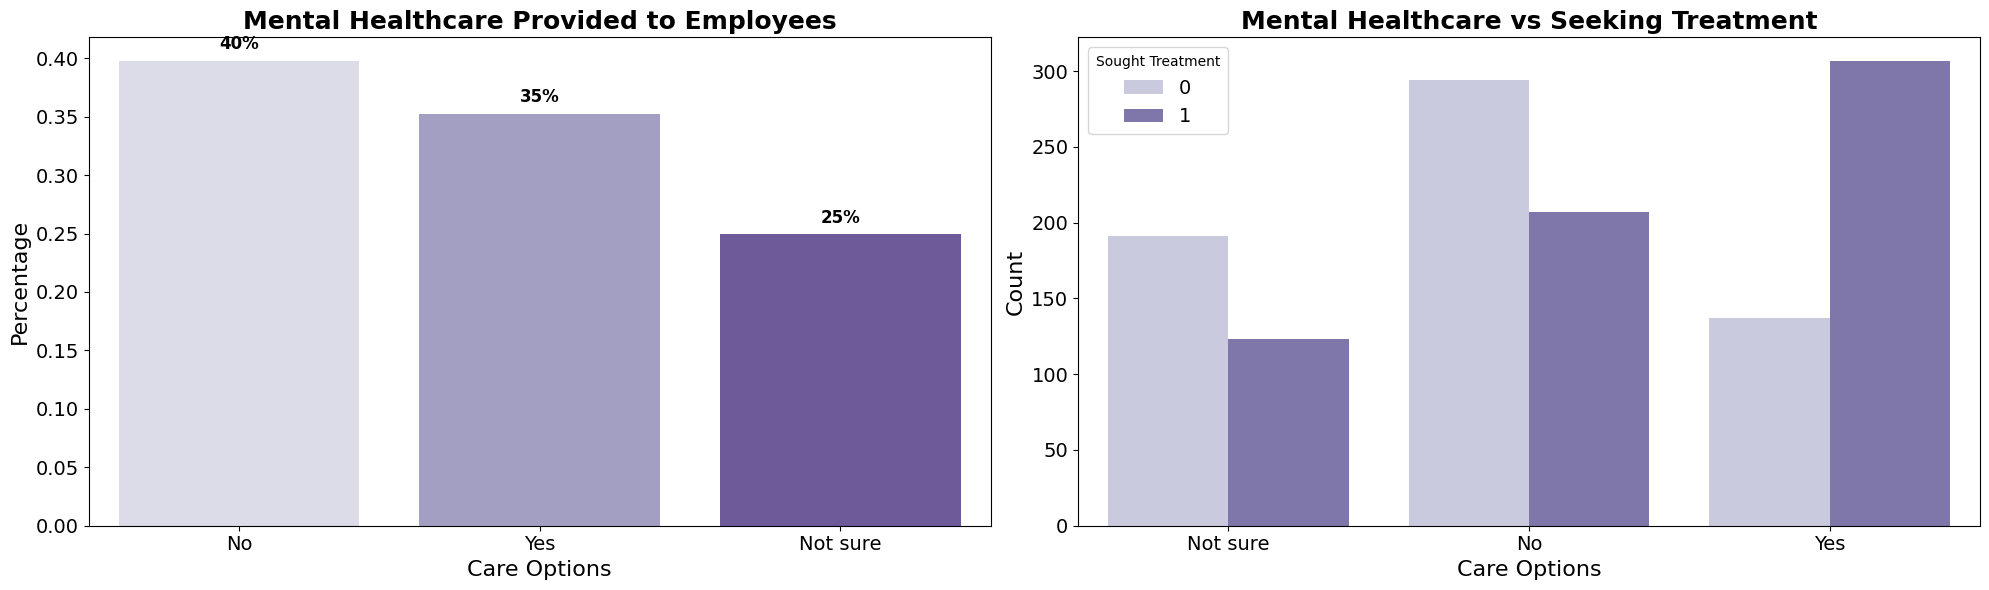

In [45]:
plt.figure(figsize=(20, 6))

# --- Subplot 1: Percentage of care options ---
plt.subplot(1, 2, 1)
eda_percentage = df['care_options'].value_counts(normalize=True).rename_axis('care_options').reset_index(name='Percentage')
ax = sns.barplot(x='care_options', y='Percentage', data=eda_percentage, palette='Purples')

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0%}', (p.get_x() + p.get_width() / 2., height + 0.01),
                ha='center', fontweight='bold', fontsize=12)

plt.title('Mental Healthcare Provided to Employees', fontsize=18, fontweight='bold')
plt.xlabel('Care Options', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# --- Subplot 2: Count of care options by treatment ---
plt.subplot(1, 2, 2)
sns.countplot(x='care_options', hue='treatment', data=df, palette='Purples')

plt.title('Mental Healthcare vs Seeking Treatment', fontsize=18, fontweight='bold')
plt.xlabel('Care Options', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Sought Treatment', fontsize=14)

plt.tight_layout()
plt.show()

This was the respondent's answer to the question, 'Do you know the options for mental health care your employer provides?'.

Since this graph is more or less similar to the benefits one, we won't be discussing it in more detail.

### MH a part of an employerr welness program

<ipython-input-46-62c0e032b40c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-46-62c0e032b40c>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


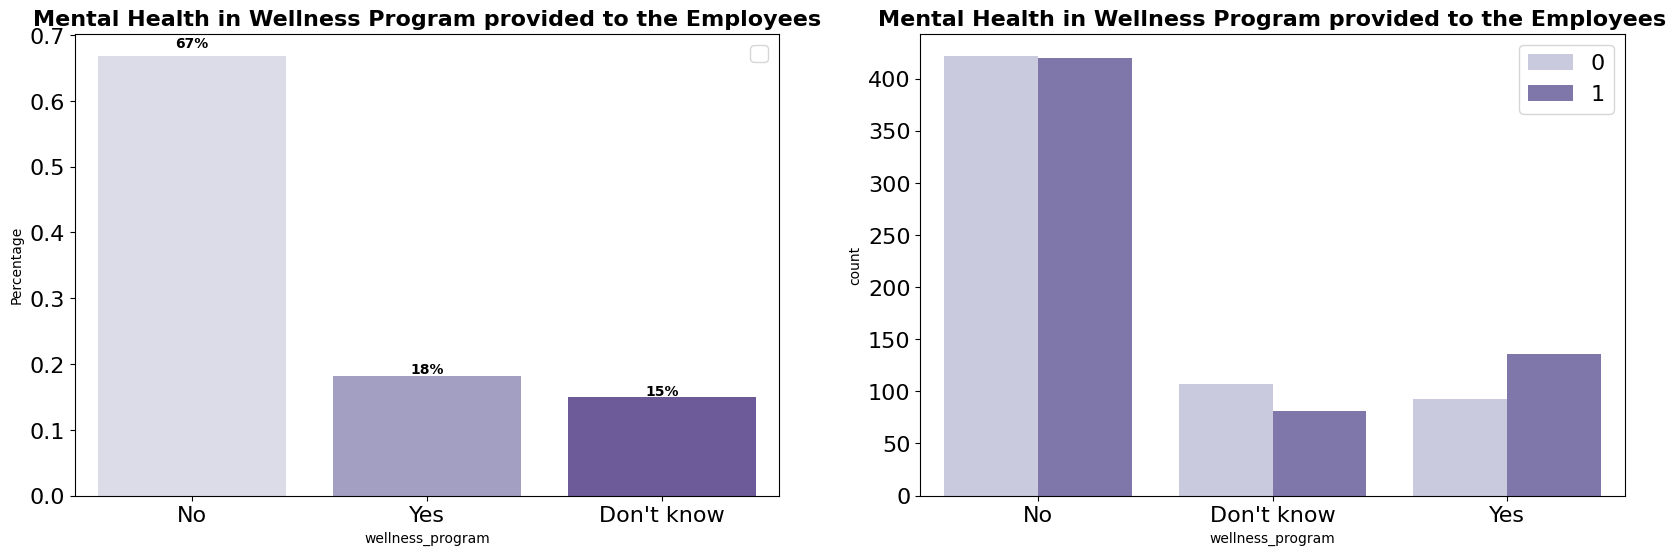

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data=df, x='wellness_program', hue ='treatment', palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondents answer to the question, 'Has your employer ever discussed mental health as part of an employee wellness program?'.

About 18% of the repondents say YES about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment.
One shocking revealation is that more than 65% of respondents say that there aren't any wellness programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon.

### Ressources provided to seek help

<ipython-input-47-fea433ac7751>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'seek_help', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-47-fea433ac7751>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


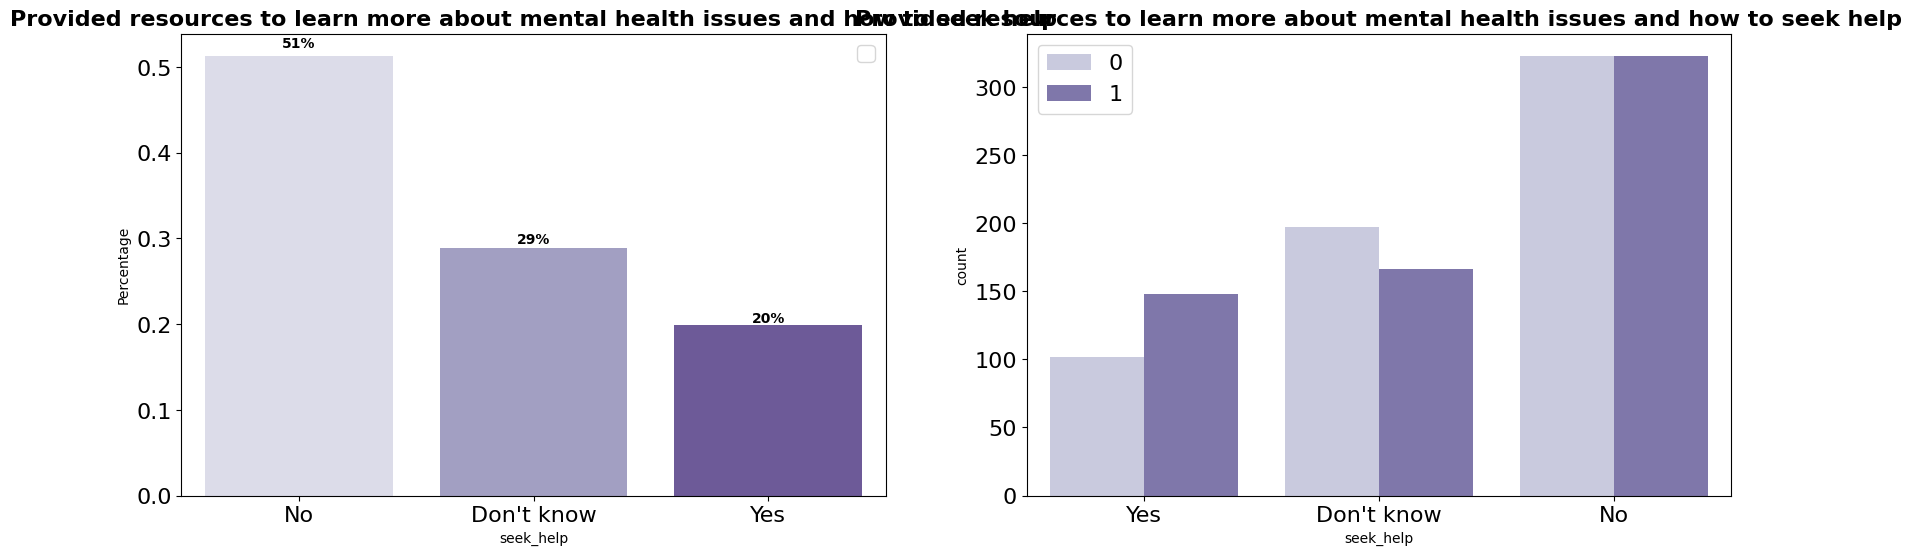

In [47]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['seek_help'].value_counts(normalize = True).rename_axis('seek_help').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'seek_help', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Provided resources to learn more about mental health issues and how to seek help', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data=df, x='seek_help', hue ='treatment', palette='Purples')
plt.title('Provided resources to learn more about mental health issues and how to seek help', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

### Considerations when MH issues

Anonymity

<ipython-input-48-8560990bb5b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-48-8560990bb5b3>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


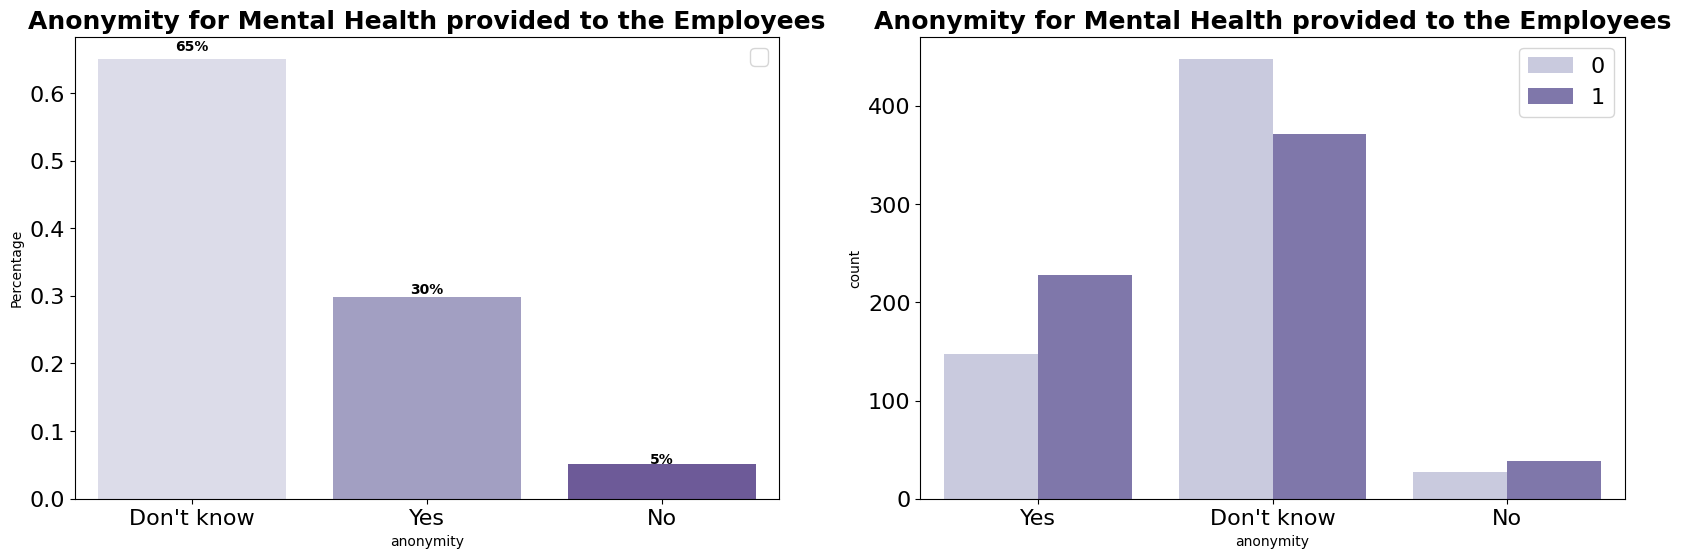

In [48]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data = df,x='anonymity', hue ='treatment', palette='Purples')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Inference:
This is the respondent's answer to the question, 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?'.

Around 65% of the people were not aware whether anonymity was provided to them and 30% said yes to the provision of anonymity by the company.
Looking at the second graph, we see that out of the people who answered yes to the provision of anonymity, around 60% of them were seeking help regarding their mental condition. Possible reasoning for this may be that the employee feels that the company has protected his/her privacy and can be trusted with knowing the mental health condition of it's workers. The most basic reason behind hiding this from the fellow workers can be the social stigma attached to mental health.

Medical leave

<ipython-input-49-e684f7c98a16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-49-e684f7c98a16>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


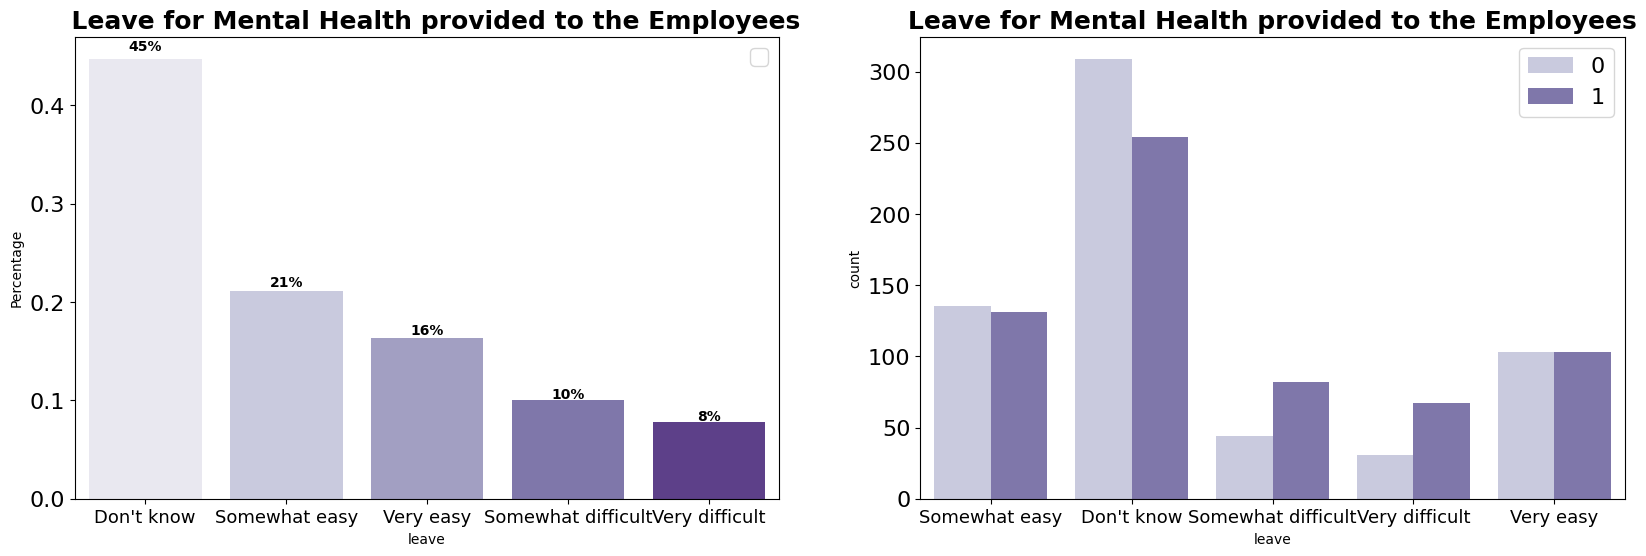

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data=df, x='leave', hue = 'treatment', palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

While close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
A small percent of people ( around 8% ) said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.

## Physical vs Mental

### Consequences of discussing Mental health

<ipython-input-50-43a93d2e535b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-50-43a93d2e535b>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


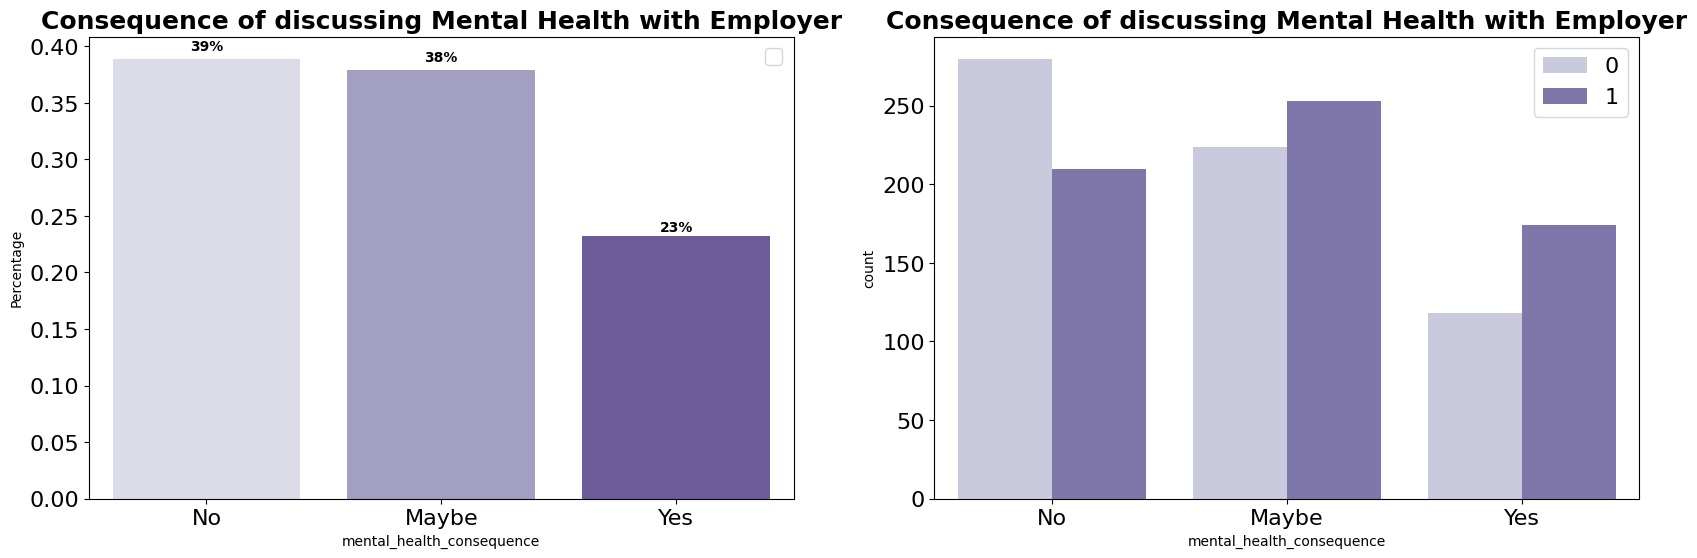

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data= df, x='mental_health_consequence', hue ='treatment', palette='Purples')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a mental health issue with your employer would have negative consequences?'.

Around same number of people ( around 39% each ) answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 23% said Yes to it.
23% is a significant number who feel that discussing their mental health might create a negative impact on their employer. This may be because of the stigma, decreased productivity, impact on promotions or any other preconcieved notion.
It is nice to know that out of the people who answered No, there were only around 40% of the people who actually sought after help, whereas in both the other categories, it is more than 50%.

### Consequences of discussing physical health

<ipython-input-51-99b6ded5a27e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-51-99b6ded5a27e>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


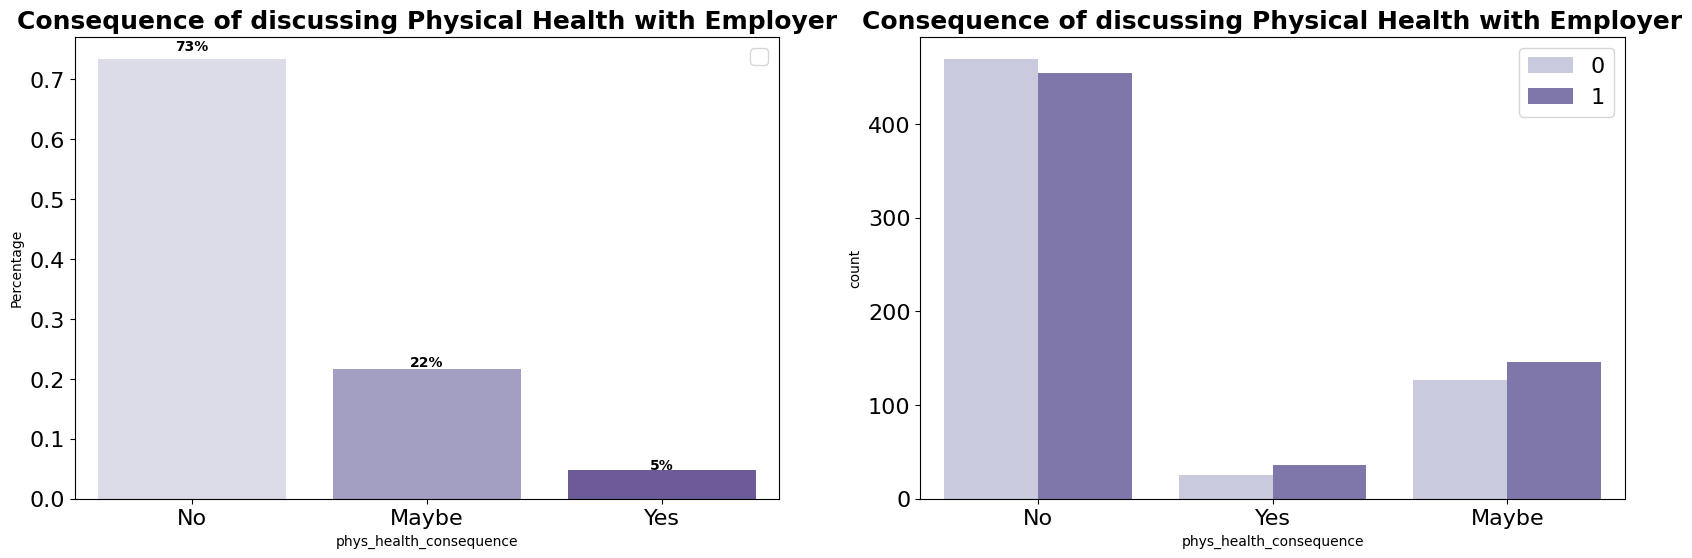

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data= df, x='phys_health_consequence', hue ='treatment', palette='Purples')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a physical health issue with your employer would have negative consequences?'

There is a starking difference between the reponses for the same question regarding mental and physical health. More than 70% of the employees believe that their physical health does not create a negative impact on their employer and only 5% of them believes that it does.
While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, we must keep in mind about how differently mental and physical health are treated as a whole.

### Bring mental Health issues in an interview

<ipython-input-52-7f1d74b0e343>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-52-7f1d74b0e343>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


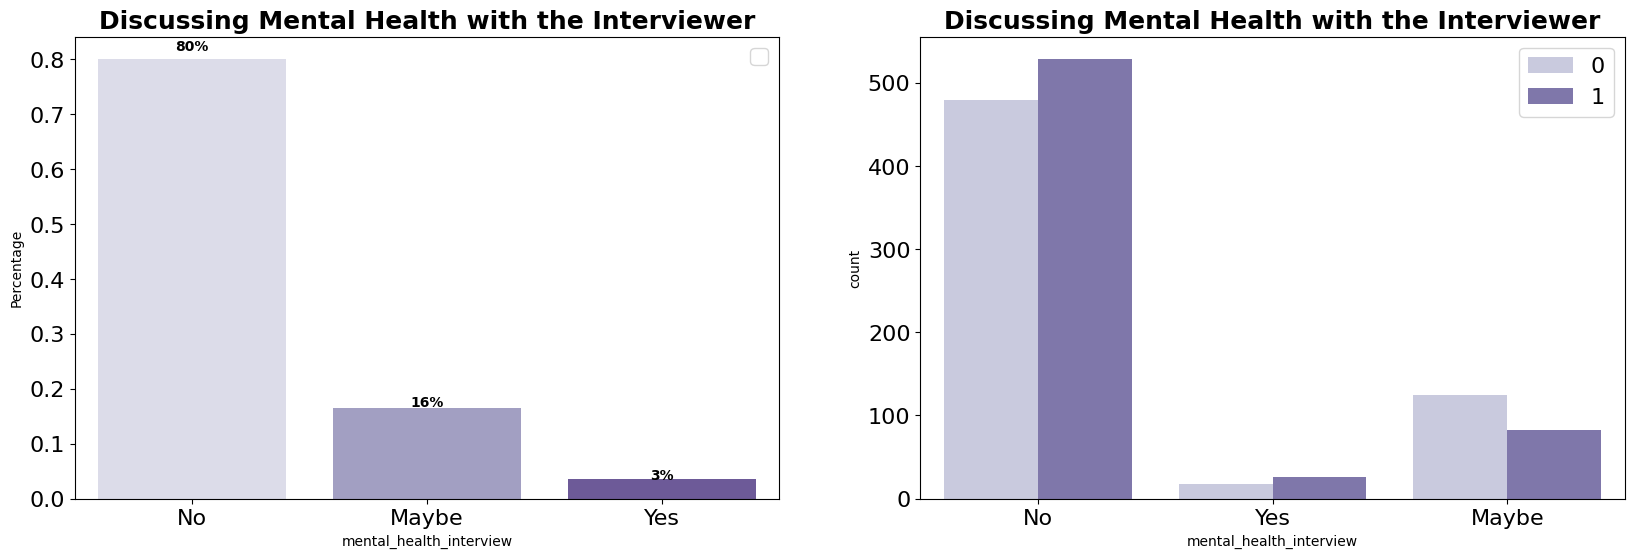

In [52]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_interview'].value_counts(normalize = True).rename_axis('mental_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data= df, x='mental_health_interview', hue ='treatment', palette='Purples')
plt.title('Discussing Mental Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Do you think that discussing a mental health issue with your employer would have negative consequences?'.

As our intution might suggest us, 80% of the respondents believe that it is a good option to discuss your mental health with the future employer. This is actually a good thing! This might not have been the case 15 years ago.
While around 15% of the candidates seem confused about whether they should be discussing their mental conditions with the future employer or not, less than 5% think that it may not be a good option discussing it.
The next category is physical_health_interview. Let's see if there's any difference in the respondent's answer for this one with the previous one.

### Bring physical Health issues in an interview

<ipython-input-53-3b9509665c3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
<ipython-input-53-3b9509665c3d>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


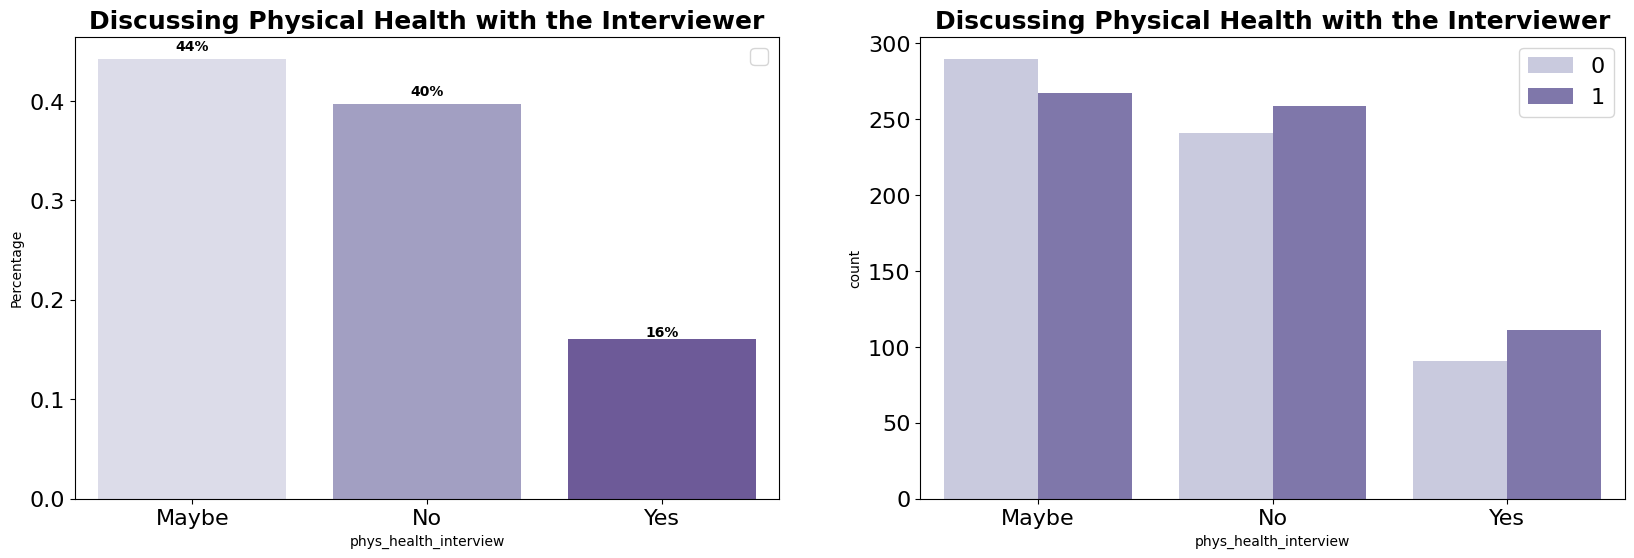

In [53]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_interview'].value_counts(normalize = True).rename_axis('phys_health_interview').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_interview', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(data= df, x='phys_health_interview', hue ='treatment', palette='Purples')
plt.title('Discussing Physical Health with the Interviewer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, 'Would you bring up a physical health issue with a potential employer in an interview?'.

While a majority of the people are still dubious about discussing their physical health condition with the future employer, however, close to 17% believe that there is no issue in discussing their physical health conditions.
Around 50% of the people still remain confused about whether it is a good option to discuss their condition or not.

### Comments

In [54]:
df['comments'].unique()

array(['No comments',
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later',
       'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better',
       'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding

# Model training and evaluation

In [55]:
list_col=['age', 'gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37. 44. 32. 31. 33. 35. 39. 42. 23. 29. 36. 27. 46. 41. 34. 30. 40. 38.
 50. 24. 18. 28. 26. 22. 19. 25. 45. 21. 43. 56. 60. 54. 55. 48. 20. 57.
 58. 47. 62. 51. 65. 49. 53. 61. 72.] 
GENDER :['FeMale' 'M' 'Male' 'Male-ish' 'Maleaile' 'Trans-FeMale' 'Cis FeMale' 'F'
 'soMaleething kinda Male?' 'Cis Male' 'WoMalean' 'Female' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'FeMaleake' 'woMalean' 'Make'
 'Nah' 'All' 'Enby' 'Femaleluid' 'Genderqueer' 'FeMale ' 'Androgyne'
 'Agender' 'cis-FeMale/FeMalealeeMaleMalee' 'Guy (-ish) ^_^'
 'Male leaning androgynous' 'Male ' 'Man' 'Trans woMalean' 'Malesle'
 'Neuter' 'FeMale (trans)' 'queer' 'FeMale (cis)' 'Mail' 'cis Male'
 'A little about you' 'Malr' 'p' 'FeMalealeeMaleail' 'Cis Man'
 'ostensibly Male, unsure what that really Maleeans'] 
SELF_EMPLOYED :['Unknown' 'Yes' 'No'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :[1 0] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown'] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '1

In [56]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [57]:
df['treatment'].value_counts()

,count
treatment,
1,637
0,622


We can see that the target column, i.e 'treatment' has almost equal values for both the categories. This means that we do not have to perform undersampling or oversampling.
Now let us make a heatmap and try to understand the correlation of various features with the target variable.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1900 entries, 927 to 2114
Data columns (total 24 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   age                                                                                                                   1900 non-null   float64
 1   self_employed                                                                                                         1900 non-null   int64  
 2   family_history                                                                                                        1900 non-null   int64  
 3   work_interfere                                                                                                        1900 non-null   int64  
 4   no_employ

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop(['treatment','comments','country','state','gender', 'timestamp'], axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [61]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, m

In [62]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8253968253968254
KNeighborsClassifier 0.6613756613756614
DecisionTreeClassifier 0.7433862433862434
RandomForestClassifier 0.8650793650793651
GradientBoostingClassifier 0.8386243386243386
AdaBoostClassifier 0.8465608465608465
XGBClassifier 0.8359788359788359


Text(50.722222222222214, 0.5, 'Actual')

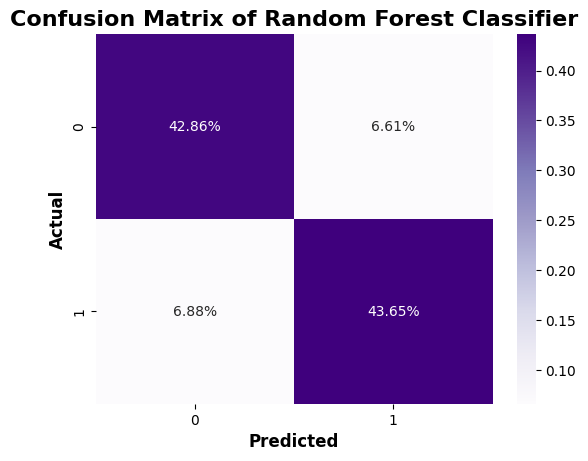

In [63]:
rfc = models['RandomForestClassifier']  # get the already fitted model
pred = rfc.predict(X_test)

cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming rfc is already trained (if not, include rfc.fit(X_train, y_train))
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # change 'binary' if needed
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Random Forest Classifier Metrics:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall   : {recall:.4f}")
print(f"  F1 Score : {f1:.4f}")


Random Forest Classifier Metrics:
  Accuracy : 0.8519
  Precision: 0.8426
  Recall   : 0.8691
  F1 Score : 0.8557


# Analysis after modeling

<ipython-input-65-8b6c6c5c420d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


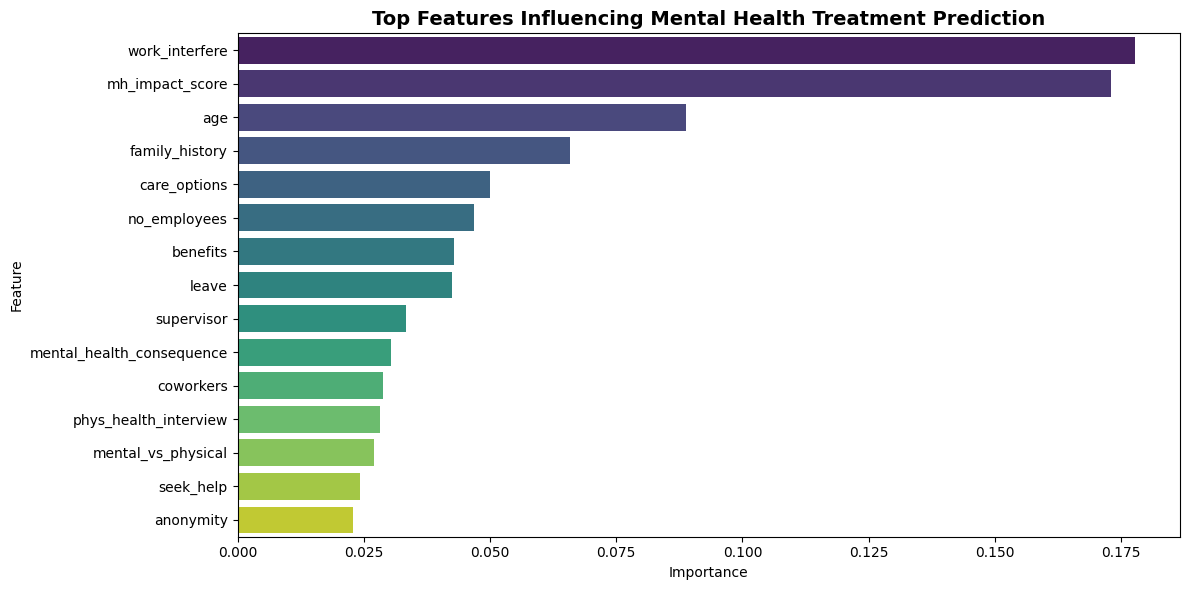

In [65]:
# Feature importance
importances = rfc.feature_importances_
features = X_train.columns  # assuming you didn't change column order
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top Features Influencing Mental Health Treatment Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()